In [16]:
#Initiating Mapping
from arcgis.gis import GIS
def connection(url,clientid,profile):
    """This function connects the python environment to the ARC GIS environment."""
    try:
        return GIS(url,client_id=clientid,verify_cert=False,profile=profile)
    except:
        print("Connection Failed. Check information")
gis = connection("https://utoronto.maps.arcgis.com","INSERT_KEY",'INSERT_ID')

Profile rajutush_utoronto does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the rajutush_utoronto profile, run GIS(profile = 'rajutush_utoronto', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)
Setting `verify_cert` to False is a security risk, use at your own risk.


Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=JvkrjiDn08FnVg9k&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=JnrwzhIA8nzzGHEkHnjO46ZCWZlUWk&allow_verification=false
Enter code obtained on signing in using SAML: ········


In [17]:
#Searching for a feature layer consisting of the Toronto neighbourhoods to map the boundaries. Utilized the layer created by the professor.
search_results = gis.content.search('owner:macdo925_utoronto',
                                    'Feature Layer')
search_results

[<Item title:"RSM8431 Toronto Neighbourhoods" type:Feature Layer Collection owner:macdo925_utoronto>,
 <Item title:"utoronto" type:Feature Layer Collection owner:macdo925_utoronto>,
 <Item title:"Crime2018" type:Feature Layer Collection owner:macdo925_utoronto>]

In [18]:
new_item = search_results[0]
new_item.layers

[<FeatureLayer url:"https://services1.arcgis.com/9NvE8jKNWWlDGsUJ/arcgis/rest/services/RSM8431_Toronto_Neighbourhoods/FeatureServer/0">]

In [19]:
from arcgis.features import FeatureLayer
src_url = "https://services1.arcgis.com/9NvE8jKNWWlDGsUJ/arcgis/rest/services/RSM8431_Toronto_Neighbourhoods/FeatureServer/0"
fl = FeatureLayer(url=src_url)
fset_toronto = fl.query(as_df=True)
fset_toronto.columns

Index(['FID', 'NAME', 'neighb', 'avg_black', 'avg_ethnic', 'avg_plico',
       'avg_phhlds', 'avg_yngmal', 'avg_tpop', 'avg_movers', 'avg_ttpop',
       'avg_unemp', 'avg_ttlabf', 'avg_divml', 'avg_ttlml', 'avg_ttlinc',
       'avg_ttlhhd', 'avg_lonepa', 'avg_ttlfam', 'avg_univer', 'avg_ttledu',
       'avg_gvttra', 'avg_ttlsou', 'avg_rctimm', 'avg_owned', 'avg_ttlown',
       'pct_black', 'pct_poor', 'pct_bucks', 'pct_mob', 'pct_unemp', 'pct_div',
       'avg_hhinc', 'pct_lpar', 'pct_ba', 'pct_dole', 'pct_immig', 'pct_owner',
       'mvictims_s', 'fvictims_s', 'intfemi', 'gunhomi', 'males15_34',
       'ttl_victim', 'RecentImmi', 'disadv_nob', 'log_avgpop', 'AvgTotPop',
       'Zavg_hhinc', 'Zpct_lpar', 'Zpct_dole', 'disadvanta', 'disadvan_1',
       'census86re', 'census91re', 'census96re', 'census01re', 'c86_tpop',
       'c91_tpop', 'c96_tpop', 'c01_tpop', 'Avgcensus', 'LoMedHi', 'avgpop',
       'youngmales', 'AvgTotPop1', 'males15_35', 'males15_36', 'ttlviclag',
       'intfemlag

In [20]:
fset_toronto = fl.query()
fset_toronto

<FeatureSet> 140 features

In [21]:
df_toronto = fset_toronto.sdf[["NAME","SHAPE",'Shape__Area', 'Shape__Length','avg_tpop']]
#Creating a function to align the neighbourhood names between the mapping data and the covid data imported in the below cells.
def replaceval(df,new,old):
    """Replacing the neighbourhood name's to ensure alignment between the datasets."""
    try:
        df.loc[df['NAME'] == old, 'NAME'] = new
    except IndexError as e:
        print(f"{e}")
#Sorting Data    
df_toronto = df_toronto.sort_values(by=['NAME'],ignore_index=True)

In [22]:
#Loading Dataset - https://open.toronto.ca/dataset/covid-19-cases-in-toronto/
#Pivot tables created using excel.
#Importing the Data
import pandas as pd
datainput = 'C:/Users/91967/Downloads/Rotman/Main Subjects/RSM8431 - Analytics Colloquia/Python/COVID19 cases.xlsx'

In [23]:
#Processing Data
covidstatus = pd.read_excel(datainput,"Modified COVID Status")
replaceval(covidstatus, 'Brichcliffe-Cliffside', 'Birchcliffe-Cliffside')
replaceval(covidstatus, 'Bridle Path-Sunnybrooke-York Mills', 'Bridle Path-Sunnybrook-York Mills')
replaceval(covidstatus, 'Cabbagetown-South St.Jamestown', 'Cabbagetown-South St. James Town')
replaceval(covidstatus, 'Caledonia - Fairbanks', 'Caledonia-Fairbank')
replaceval(covidstatus, 'Centenial Scarborough', 'Centennial Scarborough')
replaceval(covidstatus, 'Corsa Italia-Davenport', 'Corso Italia-Davenport')
replaceval(covidstatus, 'Danforth Village Toronto', 'Danforth')
replaceval(covidstatus, 'Danforth Village East York', 'Danforth-East York')
replaceval(covidstatus, 'Dowsnview-Roding-CFB', 'Downsview-Roding-CFB')
replaceval(covidstatus, 'East End Danforth', 'East End-Danforth')
replaceval(covidstatus, 'Junction', 'Junction Area')
replaceval(covidstatus, 'Lambton-Baby Point', 'Lambton Baby Point')
replaceval(covidstatus, "L'Amoureaux", "L'Amoreaux")
replaceval(covidstatus, 'Markland Woods', 'Markland Wood')
replaceval(covidstatus, 'Mimco', 'Mimico (includes Humber Bay Shores)')
replaceval(covidstatus, 'North St.Jamestown', 'North St. James Town')
replaceval(covidstatus, 'Oakwood-Vaughan', 'Oakwood Village')
replaceval(covidstatus, "O'Conner-Parkview", "O'Connor-Parkview")
replaceval(covidstatus, 'Rockliffe-Smythe', 'Rockcliffe-Smythe')
replaceval(covidstatus, 'Wexford/Maryville', 'Wexford/Maryvale')
replaceval(covidstatus, 'Crescent Town', 'Taylor-Massey')
covidstatus = covidstatus.sort_values(by=['NAME'],ignore_index=True)

In [24]:
#Mapping the average population of each neighbourhood on the map.
map1 = gis.map("Toronto",zoomlevel=11)
map1.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"avg_tpop"})
map1.legend = True
map1

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [25]:
#Merging Datasets - Appending Columns
df_toronto['Resolved'] = covidstatus['RESOLVED']
df_toronto['Deaths'] = covidstatus['FATAL']

In [26]:
#Using the merge function causes a misalignment. Therefore we just sorted the tables and added the columns to the data as the rows are the same.
#df_toronto1 = df_toronto.merge(covidstatus,on="NAME",how="left")

In [27]:
#Mapping resolved cases per neighbourhood.
toronto_map1 = gis.map("Toronto",zoomlevel=11)
toronto_map1.clear_graphics()
try:
    df_toronto.spatial.plot(map_widget=toronto_map1,renderer_type='c',method='esriClassifyNaturalBreaks',class_count=5,col='Resolved',cmap='plasma')
    toronto_map1.legend = True
except:
    print("Error in mapping. Please check data. Possible depreciation in functions used by code.")
toronto_map1

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [28]:
#Mapping fatalities per neighbourhood
toronto_map2 = gis.map("Toronto",zoomlevel=11)
toronto_map2.clear_graphics()
try:
    df_toronto.spatial.plot(map_widget=toronto_map2,renderer_type='c',method='esriClassifyNaturalBreaks',class_count=5,col='Deaths',cmap='magma')
    toronto_map2.legend = True
except:
    print("Error in mapping. Please check data. Possible depreciation in functions used by code.")
toronto_map2

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [29]:
import matplotlib.pyplot as plt
covidcases = pd.read_excel(datainput,"COVID19 Number of Cases")
covidcases = covidcases.drop(covidcases.index[-1])
covidcases

,EpisodeDate,NumberOfCases
0,2020-01-21 00:00:00,1
1,2020-01-22 00:00:00,2
2,2020-01-27 00:00:00,1
3,2020-02-01 00:00:00,1
4,2020-02-05 00:00:00,1
...,...,...
1314,2023-09-22 00:00:00,63
1315,2023-09-23 00:00:00,45
1316,2023-09-24 00:00:00,45
1317,2023-09-25 00:00:00,56


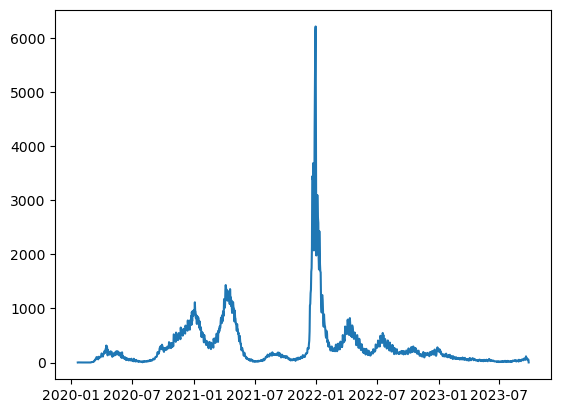

In [30]:
#Plotting function to identify trends.
def plottingtool(x,y):
    """Plot graphs between x & y to identify trends."""
    try:
        plt.plot(x,y)
    except:
        print("Mapping variables need to be checked.")
#Visualizing the data of the number of cases against dates to see the trends across the years.    
plottingtool(covidcases.EpisodeDate,covidcases.NumberOfCases)